## Normalizacion de los datos

In [ ]:
#Para ver si los datos están dentro de una distribución normal existen tres métodos
#1.Histograma
#2.Grafico de quentile-quantile
#3.Prueba de hsapiro-wilks

#### 1. Carga de librerias y datos

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pylab
import scipy.stats as stats

In [7]:
datos=pd.read_csv('C:/Users/pc/Desktop/rociochavez/Rocio-Chavez-youtube-Files-master/Ejemplo normalizacion.csv', index_col=0)

In [8]:
datos

,A,B,C
Id,,,
1,945,1814,235
2,1978,5588,6850
3,1028,22890,505
4,4527,57497,8698
5,5063,54592,2510
6,3360,33287,9505
7,1996,150970,2417
8,8207,146476,1767
9,1381,699,766


In [9]:
datos.describe()

,A,B,C
count,30.000000,30.000000,30.000000
mean,3802.466667,46964.466667,4081.933333
std,2777.384316,48295.178645,3362.625944
min,203.000000,286.000000,235.000000
25%,1413.250000,5881.750000,1435.500000
50%,3246.500000,30215.500000,2716.000000
75%,5087.000000,70627.250000,6895.750000
max,9752.000000,150970.000000,11508.000000


#### 2. Creamos los histogramas

In [13]:
def crear_histograma(variable, j, color):
    plt.figure(i)
    plt.hist(datos[variable], 10, color=color, ec='black')
    plt.title('Histograma' + variable)

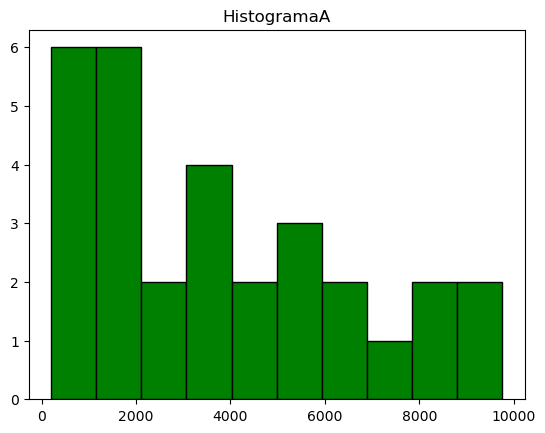

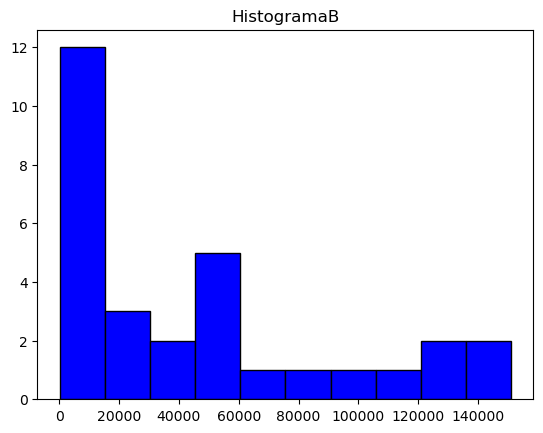

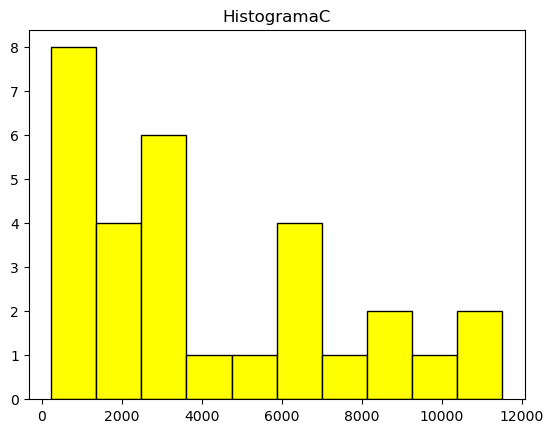

In [14]:
#Creamos una lista con las variables que utilizaremos para crear los histogramas
variable=list(datos.columns.values)

#creamos una lista con los colores que queremos que tengan los histogramas
colores=['green', 'blue', 'yellow']

#Inicialzamos una varible a utilizar para separar los histogramas
j=0

#Inicializamos una variable a utilizar para asignar un diferente color
k=0


#recorremos la lista del ciclo for
for i in variable:
    crear_histograma(i, j, colores[k])
    j+=1
    k+=1

#### 2. Quantile-Quantile

In [16]:
def crear_quantile(variable, j):
    plt.figure(j)
    stats.probplot(datos[variable], dist='norm', plot=pylab)
    plt.title('grafico Quantile-Quantile' + variable)

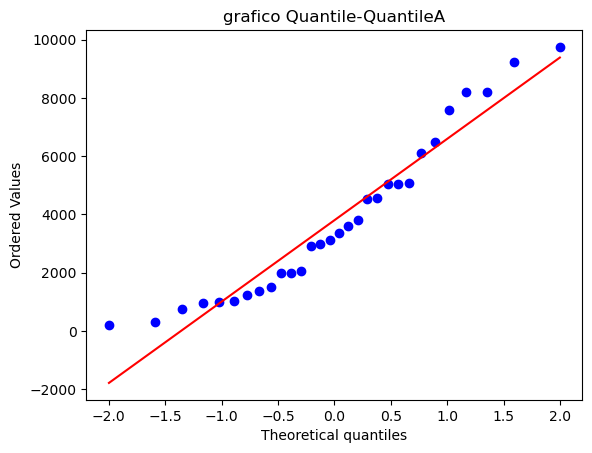

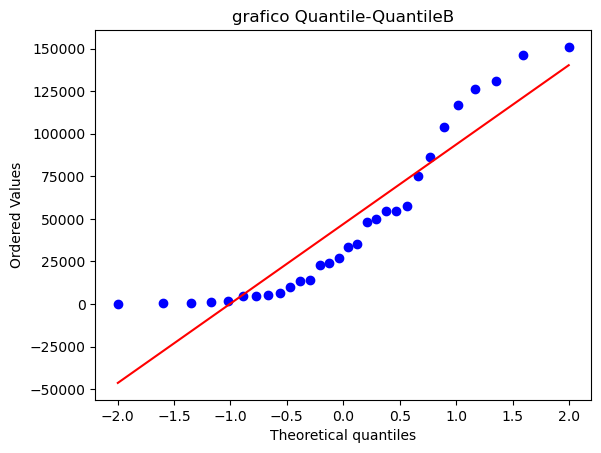

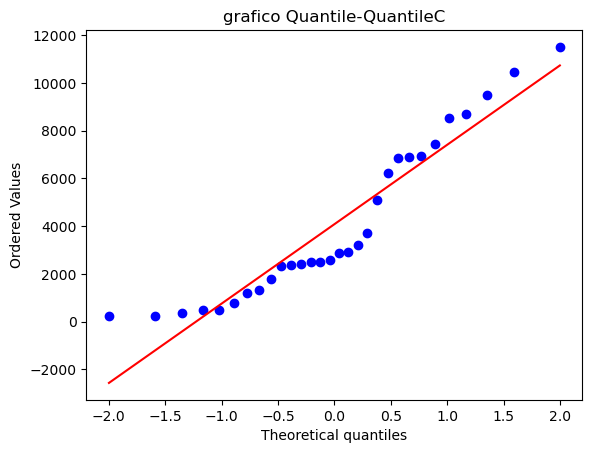

In [17]:
#Inicialzamos una varible a utilizar para separar los histogramas
j=0

#recorremos la lista del ciclo for
for i in variable:
    crear_quantile(i, j)
    j+=1

#### 3. Prueba de Shapiro Wilks

In [ ]:
#El estadistico es un valor calculado con nuestros datos y el p_value se obtiene de una tabla utilizando dicho estadistico
#Si el p_value es mayor a 0.05 se asume que se trata de una distibucón normal

In [31]:
def calcular_shapiro(variable):
    estadistico, p_value=stats.shapiro(datos[variable])
    print(f'Estadistico de {variable}={estadistico: .2f}, p_value {variable}= {p_value: .3f}')

In [32]:
for i in variable:
  calcular_shapiro(i)

Estadistico de A= 0.92, p_value A=  0.036
Estadistico de B= 0.85, p_value B=  0.001
Estadistico de C= 0.89, p_value C=  0.006


##  Normalizamos los datos

In [ ]:
Para lograr que los datos tengan una distribución normal existen dos métodos:
    1. Transformación Box-Cox
    2. Transformación Yeo-Jhonson

### 1. Box-cox

In [33]:
datos_norm_boxcox, lambda_calc= stats.boxcox(datos['A'])

In [34]:
lambda_calc

0.39011137978601756

In [35]:
datos_norm_boxcox

array([34.55263148, 46.94820725, 35.79182236, 65.82537813, 68.87689646,
       58.31688439, 47.12349058, 83.69063476, 40.47310226, 55.46364396,
       61.37638395, 83.72342499, 38.87067587, 31.66794803, 74.27796923,
       69.05270449, 56.67802963, 55.01906469, 89.69424496, 87.68955241,
       65.99595278, 41.99881315, 47.89108448, 76.06278624, 17.80666774,
       68.87689646, 35.17271395, 60.05896511, 81.02302213, 21.37377526])

In [36]:
datos_norm_boxcox=pd.DataFrame(datos_norm_boxcox)
datos_norm_boxcox

,0
0,34.552631
1,46.948207
2,35.791822
3,65.825378
4,68.876896
5,58.316884
6,47.123491
7,83.690635
8,40.473102
9,55.463644


In [37]:
datos_norm_boxcox.describe()

,0
count,30.000000
mean,56.712446
std,19.724162
min,17.806668
25%,40.854530
50%,57.497457
75%,69.008752
max,89.694245


(array([2., 1., 4., 2., 3., 5., 3., 4., 2., 4.]),
 array([17.80666774, 24.99542546, 32.18418318, 39.3729409 , 46.56169863,
        53.75045635, 60.93921407, 68.12797179, 75.31672952, 82.50548724,
        89.69424496]),
 <BarContainer object of 10 artists>)

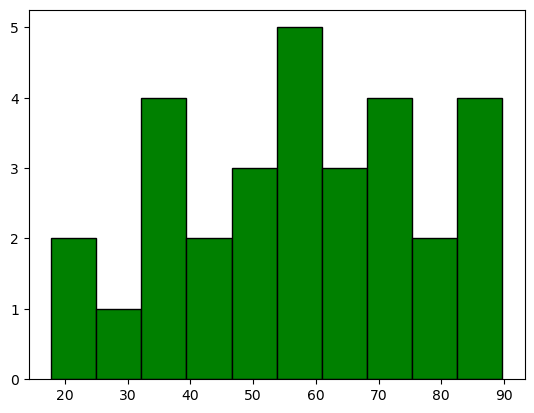

In [38]:
#Probamos la normalidad de los datos obtenidos
plt.hist(datos_norm_boxcox[0], 10, color='green', ec='black')

### 2. Transformación de Yeo-Johnson

In [44]:
datos_norm_johnson, lambda_calc=stats.yeojohnson(datos['A'])

In [45]:
lambda_calc

0.3898222474389129

In [46]:
datos_norm_johnson

array([34.52004134, 46.88415793, 35.75599975, 65.71370993, 68.75737275,
       58.22432466, 47.05900311, 83.53215645, 40.42530608, 55.37827428,
       61.27607356, 83.5648589 , 38.82694522, 31.64304231, 74.14440295,
       68.93272652, 56.58960385, 54.93481244, 89.51958289, 87.52031968,
       65.88384691, 41.94716788, 47.82467853, 75.92453944, 17.82761003,
       68.75737275, 35.13850203, 59.96199774, 80.87166136, 21.38033313])

In [47]:
datos_norm_johnson=pd.DataFrame(datos_norm_johnson)
datos_norm_johnson

,0
0,34.520041
1,46.884158
2,35.756000
3,65.713710
4,68.757373
5,58.224325
6,47.059003
7,83.532156
8,40.425306
9,55.378274


In [48]:
datos_norm_johnson.describe()

,0
count,30.000000
mean,56.624014
std,19.672648
min,17.827610
25%,40.805772
50%,57.406964
75%,68.888888
max,89.519583


(array([2., 1., 4., 2., 3., 5., 3., 4., 2., 4.]),
 array([17.82761003, 24.99680732, 32.1660046 , 39.33520189, 46.50439918,
        53.67359646, 60.84279375, 68.01199103, 75.18118832, 82.35038561,
        89.51958289]),
 <BarContainer object of 10 artists>)

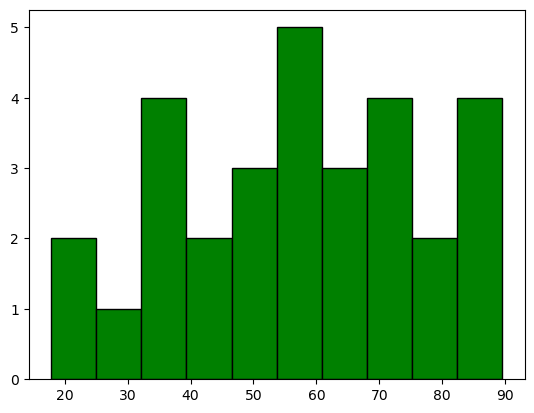

In [49]:
#Probamos la normalidad de los datos obtenidos
plt.hist(datos_norm_johnson[0], 10, color='green', ec='black')